In [3]:
import numpy as np

In [4]:
def find_area(label_path):
    polygons = []
    class_areas = {
        0: 0.0,  # Sticker
        1: 0.0,   # Cattle
    }
    
    with open(label_path, 'r') as file:
        for line in file:
            coords = line.strip().split()
            # First number is the class, the rest are coordinates
            if coords:
                class_id = int(coords[0])
                polygon = list(map(float, coords[1:]))
                polygons.append(polygon)
    
                # Calculate area of polygon (assuming the polygons are normalized [0-1])
                area = 0.0
                x_coords = [polygon[i] for i in range(0, len(polygon), 2)]
                y_coords = [polygon[i] for i in range(1, len(polygon), 2)]
                area = 0.5 * np.abs(np.dot(x_coords, np.roll(y_coords, 1)) - np.dot(y_coords, np.roll(x_coords, 1)))
    
                # Add area to the corresponding class_id
                class_areas[class_id] += area
                
    return [area for class_id, area in class_areas.items()]

In [5]:
import os
rear_dir = './labels_rear'
side_dir = './labels_side'
rear_list = sorted(os.listdir(rear_dir))
side_list = sorted(os.listdir(side_dir))

In [71]:
from tqdm import tqdm
s_main = 'labels_side/'
r_main = 'labels_rear/'
ls = []
dict = {'F':1,'M':0}
for i in tqdm(range(len(side_list))):
    s_dir = []
    r_dir = rear_list[i]
    for j in r_dir:
        if(j=='r'):
            s_dir.append('s')
        else:
            s_dir.append(j)
    s_dir = ''.join(s_dir)
    if os.path.exists(os.path.join(s_main,s_dir)):
        s_dir = ''.join(s_dir)
        side_area = find_area(os.path.join(s_main,s_dir))
        rear_area = find_area(os.path.join(r_main,r_dir))
        tls = [dict[s_dir.split('.')[0].split('_')[-1]],side_area[0]/side_area[1],side_area[0]/rear_area[1],rear_area[1]/side_area[1],side_area[0],side_area[1],rear_area[1],int(s_dir.split('.')[0].split('_')[-2])]
        ls.append(tls)

100%|██████████████████████████████████████████████████████████████████████████████| 1943/1943 [00:25<00:00, 75.65it/s]


In [72]:
columns = ['Gender','ratio_side','ratio_rear','ratio_side_rear','Area_ref','Area_side','Area_back','Weight']

In [73]:
import pandas as pd

In [74]:
df = pd.DataFrame(ls,columns = columns)

In [75]:
df[df['Weight']>100]

,Gender,ratio_side,ratio_rear,ratio_side_rear,Area_ref,Area_side,Area_back,Weight
0,1,0.009616,0.028413,0.338455,0.002500,0.259960,0.087985,124
1,1,0.013026,0.037411,0.348176,0.004144,0.318114,0.110760,149
2,1,0.011974,0.044870,0.266861,0.002499,0.208716,0.055698,142
3,0,0.015015,0.048857,0.307331,0.003124,0.208086,0.063951,136
4,1,0.014823,0.037183,0.398647,0.003956,0.266861,0.106384,124
...,...,...,...,...,...,...,...,...
1930,1,0.014120,0.058154,0.242802,0.002152,0.152394,0.037002,142
1931,1,0.010337,0.039142,0.264086,0.003685,0.356504,0.094148,136
1933,1,0.011293,0.035686,0.316455,0.003171,0.280794,0.088859,140
1934,1,0.014786,0.038840,0.380683,0.004477,0.302819,0.115278,104


In [101]:
sorted(df['Weight'].unique())

[69,
 72,
 73,
 74,
 75,
 77,
 78,
 79,
 81,
 82,
 85,
 86,
 87,
 89,
 90,
 91,
 92,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 106,
 107,
 109,
 110,
 111,
 112,
 114,
 115,
 117,
 119,
 120,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 140,
 141,
 142,
 143,
 144,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 162,
 163,
 164,
 166,
 167,
 168,
 169,
 170,
 172,
 173,
 174,
 176,
 177,
 178,
 179,
 180,
 181,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 192,
 193,
 194,
 195,
 196,
 197,
 199,
 200,
 202,
 204,
 205,
 206,
 207,
 208,
 209,
 211,
 212,
 213,
 214,
 216,
 217,
 218,
 219,
 220,
 222,
 223,
 224,
 226,
 227,
 229,
 231,
 232,
 233,
 234,
 235,
 237,
 239,
 240,
 242,
 243,
 245,
 246,
 247,
 248,
 251,
 254,
 256,
 257,
 259,
 261,
 262,
 268,
 269,
 274,
 276,
 277,
 280,
 285,
 294,
 297,
 307]

Gender             0.188033
ratio_side        -0.600751
ratio_rear        -0.413946
ratio_side_rear    0.067058
Area_ref          -0.336179
Area_side          0.217946
Area_back          0.230850
Name: Weight, dtype: float64


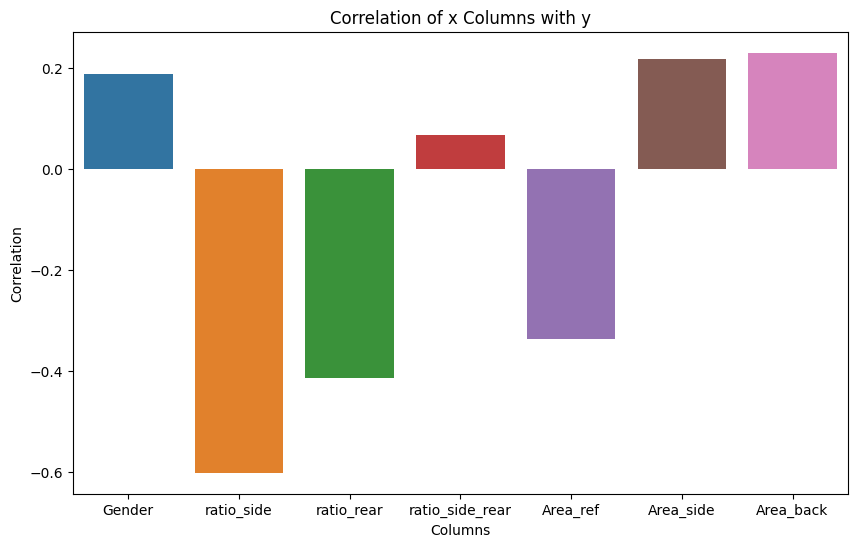

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation of each 'x' column with 'y'
correlation_with_y = correlation_matrix['Weight'].drop('Weight')

print(correlation_with_y)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_y.index, y=correlation_with_y.values)
plt.title('Correlation of x Columns with y')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.show()

In [78]:
X_train = df[df['Weight']!=101]
X_train.drop(columns=['Weight'],axis=1,inplace=True)
y_train = df[df['Weight']!=101]['Weight']
X_valid = df[df['Weight']==101]
X_valid.drop(columns=['Weight'],axis=1,inplace=True)
y_valid = df[df['Weight']==101]['Weight']

C:\Users\USER\AppData\Local\Temp\ipykernel_14140\1255288188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['Weight'],axis=1,inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_14140\1255288188.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid.drop(columns=['Weight'],axis=1,inplace=True)


# Remember to use scaler in test or inference

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

In [79]:
X_train

,Gender,ratio_side,ratio_rear,ratio_side_rear,Area_ref,Area_side,Area_back
0,1,0.009616,0.028413,0.338455,0.002500,0.259960,0.087985
1,1,0.013026,0.037411,0.348176,0.004144,0.318114,0.110760
2,1,0.011974,0.044870,0.266861,0.002499,0.208716,0.055698
3,0,0.015015,0.048857,0.307331,0.003124,0.208086,0.063951
4,1,0.014823,0.037183,0.398647,0.003956,0.266861,0.106384
...,...,...,...,...,...,...,...
1930,1,0.014120,0.058154,0.242802,0.002152,0.152394,0.037002
1931,1,0.010337,0.039142,0.264086,0.003685,0.356504,0.094148
1932,0,0.017540,0.049099,0.357232,0.005199,0.296404,0.105885
1933,1,0.011293,0.035686,0.316455,0.003171,0.280794,0.088859


In [80]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
test_pred = lin_reg.predict(X_valid)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_valid, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 26.706037488824997
MSE: 1070.069822671546
RMSE: 32.71192172085807
R2 Square 0.0
__________________________________
Train set evaluation:
_____________________________________
MAE: 21.199005753544576
MSE: 734.6928972081457
RMSE: 27.105219003139336
R2 Square 0.41915285061834084
__________________________________


In [93]:
lin_reg.predict([[1,0.019260,0.056854,0.338767,0.005969,0.309893,0.104982]])

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([109.24815129])

In [94]:
test_pred = lin_reg.predict(X_valid)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_valid, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 26.706037488824997
MSE: 1070.069822671546
RMSE: 32.71192172085807
R2 Square 0.0
__________________________________
Train set evaluation:
_____________________________________
MAE: 21.199005753544576
MSE: 734.6928972081457
RMSE: 27.105219003139336
R2 Square 0.41915285061834084
__________________________________


In [97]:
import pickle
Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(lin_reg, file)

In [64]:
from sklearn.linear_model import RANSACRegressor,LinearRegression

model = RANSACRegressor( max_trials=100)
model.fit(X_train, y_train)

# test_pred = model.predict(X_valid)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_valid, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 26.706037488824997
MSE: 1070.069822671546
RMSE: 32.71192172085807
R2 Square 0.0
__________________________________
Train set evaluation:
_____________________________________
MAE: 23.600914475037733
MSE: 905.169309211061
RMSE: 30.086031795686534
R2 Square 0.284374444123616
__________________________________


In [66]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
# pred = model.predict(X_valid)

# test_pred = model.predict(X_valid)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_valid, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 26.706037488824997
MSE: 1070.069822671546
RMSE: 32.71192172085807
R2 Square 0.0
__________________________________
Train set evaluation:
_____________________________________
MAE: 21.199027899050186
MSE: 734.6929025569707
RMSE: 27.10521910180714
R2 Square 0.4191528463895675
__________________________________


In [67]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

# test_pred = model.predict(X_valid)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_valid, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 26.706037488824997
MSE: 1070.069822671546
RMSE: 32.71192172085807
R2 Square 0.0
__________________________________
Train set evaluation:
_____________________________________
MAE: 21.19905131510097
MSE: 734.6929160699657
RMSE: 27.105219351076386
R2 Square 0.4191528357062131
__________________________________


In [21]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_valid)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_valid, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 26.55052222651734
MSE: 1039.7799470069072
RMSE: 32.245619035876906
R2 Square 0.0
__________________________________
Train set evaluation:
_____________________________________
MAE: 21.218647633905743
MSE: 738.1313259000067
RMSE: 27.168572393484475
R2 Square 0.41643443383275747
__________________________________


In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=1)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_valid)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_valid, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 26.70603748882504
MSE: 1070.0698226715467
RMSE: 32.71192172085808
R2 Square 0.0
__________________________________
Train set evaluation:
_____________________________________
MAE: 21.199005753544576
MSE: 734.6928972081456
RMSE: 27.105219003139332
R2 Square 0.41915285061834096
__________________________________


In [23]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_valid)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_valid, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 26.15010854850155
MSE: 1011.0421840473682
RMSE: 31.79688953415677
R2 Square 0.0
__________________________________
Train set evaluation:
_____________________________________
MAE: 21.28617525917639
MSE: 742.4580186310172
RMSE: 27.248082843220683
R2 Square 0.41301375677352914
__________________________________


In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Input layer and hidden layers
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(4, activation='relu'))
model.add(Dropout(0.1))

# Output layer for regression (linear activation)
model.add(Dense(1, activation='linear'))

# Compile the model for regression
model.compile(optimizer=Adam(learning_rate=0.00001), loss='mae', metrics=['mae'])

# Train the model
r = model.fit(X_train, y_train,
              validation_data=(X_train, y_train),
              batch_size=1,
              epochs=200)

Epoch 1/200
1917/1917 [==============================] - 12s 5ms/step - loss: 91.7140 - mae: 91.7140 - val_loss: 32.3149 - val_mae: 32.3149
Epoch 2/200
1917/1917 [==============================] - 10s 5ms/step - loss: 53.1195 - mae: 53.1195 - val_loss: 38.1070 - val_mae: 38.1070
Epoch 3/200
1917/1917 [==============================] - 10s 5ms/step - loss: 51.5728 - mae: 51.5728 - val_loss: 35.5716 - val_mae: 35.5716
Epoch 4/200
1917/1917 [==============================] - 10s 5ms/step - loss: 51.1648 - mae: 51.1648 - val_loss: 41.2816 - val_mae: 41.2816
Epoch 5/200
1917/1917 [==============================] - 10s 5ms/step - loss: 49.2148 - mae: 49.2148 - val_loss: 41.7392 - val_mae: 41.7392
Epoch 6/200
1917/1917 [==============================] - 11s 6ms/step - loss: 48.2882 - mae: 48.2882 - val_loss: 43.1337 - val_mae: 43.1337
Epoch 7/200
1917/1917 [==============================] - 10s 5ms/step - loss: 48.1387 - mae: 48.1387 - val_loss: 43.3404 - val_mae: 43.3404
Epoch 8/200
1917/191

KeyboardInterrupt: 

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=200)
rf_reg.fit(X_valid, y_valid)

test_pred = rf_reg.predict(X_valid)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_valid, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
__________________________________
Train set evaluation:
_____________________________________
MAE: 67.15597287428274
MSE: 5685.96974439228
RMSE: 75.4053694665856
R2 Square -3.4953195138416246
__________________________________


In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

#fit the data for train and test set
clf.fit(X_train, y_train)

#Predit the values for test data
y_preds = clf.predict(X_valid)

#Default score for Classification model is accuracy. So, it will show the accuracy.
clf.score(X_valid, y_valid)

0.0

In [48]:
X_train.iloc[0]

Gender       1.000000
Area_side    0.002500
Area_ref     0.259960
Area_back    0.087985
Name: 0, dtype: float64

In [84]:
import json

# Open the JSON file
with open('coco_b4_rear.json', 'r') as f:
    data = json.load(f)

# 'data' now contains the parsed JSON data as a Python dictionary
data["annotations"][0]

{'id': 1,
 'image_id': 1948,
 'category_id': 1,
 'dataset_id': 2,
 'segmentation': [],
 'area': 0,
 'bbox': [0, 0, 0, 0],
 'iscrowd': False,
 'isbbox': False,
 'creator': 'Aminul',
 'width': 1900,
 'height': 1425,
 'color': '#f3b661',
 'keypoints': [1040, 277, 2, 1044, 1273, 2, 873, 493, 2, 1194, 497, 2],
 'metadata': {},
 'milliseconds': 135743,
 'events': [{'_cls': 'SessionEvent',
   'created_at': {'$date': 1670386429065},
   'user': 'Aminul',
   'milliseconds': 135743,
   'tools_used': ['Select', 'Keypoints', 'Select', 'Keypoints', 'Select']}],
 'num_keypoints': 4}

In [100]:
dict = {'F':1,'M':0}
main = './data/labels/val'
s_dir = '1_b4-2_s_78_F.txt'
r_dir = '1_b4-2_r_78_F.txt'
side_area = find_area(os.path.join(main,s_dir))
rear_area = find_area(os.path.join(main,r_dir))
[dict[s_dir.split('.')[0].split('_')[-1]],side_area[0]/side_area[1],side_area[0]/rear_area[1],rear_area[1]/side_area[1],side_area[0],side_area[1],rear_area[1],int(s_dir.split('.')[0].split('_')[-2])]

[1,
 0.016388354713856332,
 0.06080750011853606,
 0.26951206153697216,
 0.004973222530010091,
 0.30346075715613097,
 0.08178633425671933,
 78]